# Customer Behavioral Analysis to Improve Conversion Rates

## Introduction
In this project, I aim to understand customer behavior to improve conversion rates and total purchases. Using a dataset that includes customer demographics, browsing behavior, and purchasing habits, we will explore the key factors driving or hindering sales.

The main objectives are:
1. Understand how customer demographics (age, gender, location) influence purchasing decisions.
2. Identify key behavioral patterns (e.g., device type, browsing time) that correlate with purchases.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("D:\ML\CustomerSpectra\customerdata.csv")

In [4]:
df.head(1)

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0


### Dataset Description
- **User_ID**: Unique identifier for each customer.
- **Gender**: Male/Female.
- **Age**: Age of the customer.
- **Location**: Customer's region.
- **Device_Type**: Mobile/Desktop.
- **Product_Browsing_Time**: Total browsing time spent by the customer.
- **Total_Pages_Viewed**: Number of pages the customer viewed.
- **Items_Added_to_Cart**: Number of items added to the cart.
- **Total_Purchases**: Number of purchases made.


In [5]:
df.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


In [7]:
df.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

### Correlation Matrix
A correlation matrix helps us understand the relationship between different variables in our dataset. The values range from -1 to 1:
- A value close to 1 means a strong positive correlation (as one variable increases, the other also increases).
- A value close to -1 means a strong negative correlation (as one variable increases, the other decreases).
- A value near 0 indicates no correlation.

We will now calculate the correlation between the key variables like browsing time, pages viewed, items added to the cart, and total purchases.


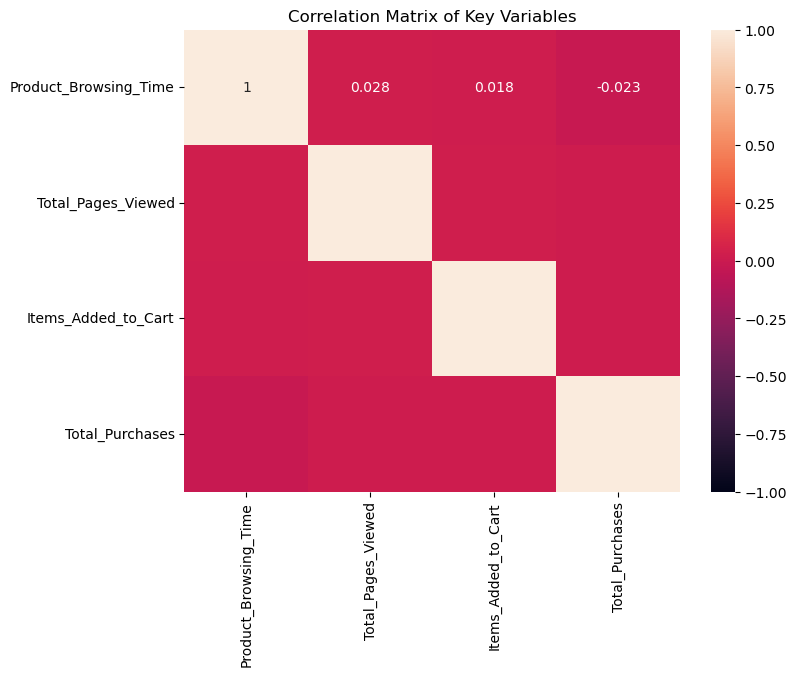

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[['Product_Browsing_Time', 'Total_Pages_Viewed', 'Items_Added_to_Cart', 'Total_Purchases']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')
plt.show()


# Hypothesis 1: Mobile Users Have Longer Browsing Times but Fewer Purchases

In [9]:
device_group = df.groupby('Device_Type')[['Product_Browsing_Time', 'Total_Purchases']].mean()
device_group

,Product_Browsing_Time,Total_Purchases
Device_Type,,
Desktop,29.830189,2.396226
Mobile,30.668539,2.533708
Tablet,31.705521,2.453988


**Interpretation:**
- Mobile users have a higher average browsing time (30.67 minutes) and more purchases (2.53) compared to desktop users (29.83 minutes and 2.40 purchases).
- Tablets have the highest browsing time (31.71 minutes) and moderate purchases (2.45).

**Business Insight:**
- The hypothesis is **not supported**. Mobile users browse more and also make more purchases compared to desktops.
- **Action**: Enhance the desktop experience to boost engagement 

### why mobile users are converting better?

In [10]:
df["Device_Type"].value_counts()

Device_Type
Mobile     178
Tablet     163
Desktop    159
Name: count, dtype: int64

- because most people have mobile 
- Even though the tablet has high browsing time it is not as convenient as mobile due to its size or easy payment methods(refering latency here)

# Hypothesis 2: Younger Customers Browse More but Purchase Less

In [11]:
age_group = df.groupby('Age')[['Product_Browsing_Time', 'Total_Purchases']].mean()

In [12]:
age_group_df = pd.DataFrame(age_group)

In [13]:
age_group_df

,Product_Browsing_Time,Total_Purchases
Age,,
18,33.034483,2.862069
19,34.653846,2.615385
20,28.375000,2.750000
21,28.861111,2.305556
22,28.300000,2.766667
23,34.656250,2.218750
24,32.280000,2.600000
25,32.888889,1.962963
26,34.111111,2.888889


* Bar Plot: Each age group will have a blue bar showing the average time spent browsing products.
* Line Plot: A red line will show the average number of purchases made by users in each age group.
* Y-Axis Labels: The left y-axis will show the browsing time in minutes, and the right y-axis will show the number of purchases.
* X-Axis: Age groups will be labeled for comparison.

In [14]:
# Print the DataFrame to check the results
print(age_group_df)


     Product_Browsing_Time  Total_Purchases
Age                                        
18               33.034483         2.862069
19               34.653846         2.615385
20               28.375000         2.750000
21               28.861111         2.305556
22               28.300000         2.766667
23               34.656250         2.218750
24               32.280000         2.600000
25               32.888889         1.962963
26               34.111111         2.888889
27               30.687500         2.312500
28               26.071429         2.357143
29               32.885714         2.200000
30               26.260870         2.000000
31               31.615385         2.923077
32               31.071429         2.071429
33               29.850000         3.200000
34               23.727273         2.454545
35               31.300000         2.233333


   Age_Group  Product_Browsing_Time  Total_Purchases
4   Under 20              33.844165         2.738727
0  Early 20s              30.494472         2.528195
2    Mid 20s              31.328929         2.344299
1  Early 30s              28.504991         2.529810
3    Mid 30s              31.300000         2.233333


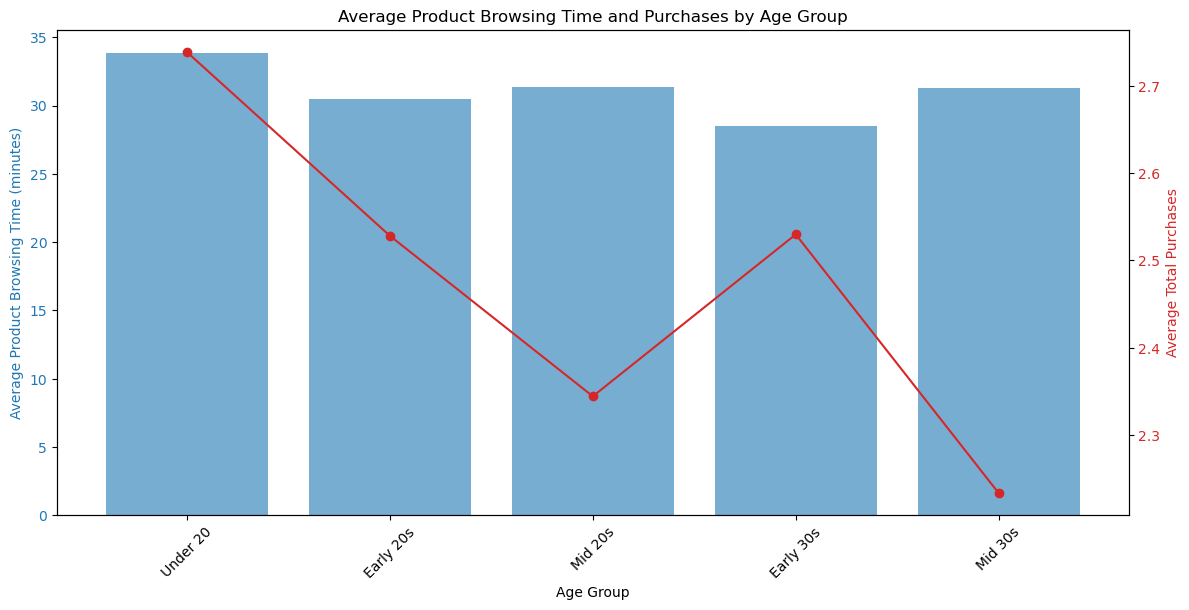

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define data
data = {
    'Age': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
    'Product_Browsing_Time': [33.034483, 34.653846, 28.375000, 28.861111, 28.300000, 34.656250, 32.280000, 
                              32.888889, 34.111111, 30.687500, 26.071429, 32.885714, 26.260870, 31.615385, 
                              31.071429, 29.850000, 23.727273, 31.300000],
    'Total_Purchases': [2.862069, 2.615385, 2.750000, 2.305556, 2.766667, 2.218750, 2.600000, 
                        1.962963, 2.888889, 2.312500, 2.357143, 2.200000, 2.000000, 2.923077, 
                        2.071429, 3.200000, 2.454545, 2.233333]
}

# Create DataFrame
data_df = pd.DataFrame(data)

# Define age groups
def age_group(age):
    if age < 20:
        return 'Under 20'
    elif 20 <= age < 25:
        return 'Early 20s'
    elif 25 <= age < 30:
        return 'Mid 20s'
    elif 30 <= age < 35:
        return 'Early 30s'
    elif 35 <= age < 40:
        return 'Mid 30s'
    else:
        return 'Late 30s'

# Apply age group categorization
data_df['Age_Group'] = data_df['Age'].apply(age_group)

# Group by age group and calculate mean browsing time and purchases
age_group_df = data_df.groupby('Age_Group').agg({
    'Product_Browsing_Time': 'mean',
    'Total_Purchases': 'mean'
}).reset_index()

# Set the order of age groups for consistent plotting
age_group_order = ['Under 20', 'Early 20s', 'Mid 20s', 'Early 30s', 'Mid 30s', 'Late 30s']
age_group_df['Age_Group'] = pd.Categorical(age_group_df['Age_Group'], categories=age_group_order, ordered=True)
age_group_df = age_group_df.sort_values('Age_Group')

# Print the DataFrame to check results
print(age_group_df)

# Plot average browsing time and purchases by age group
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average browsing time
color = 'tab:blue'
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Product Browsing Time (minutes)', color=color)
bars = ax1.bar(age_group_df['Age_Group'], age_group_df['Product_Browsing_Time'], color=color, alpha=0.6, label='Average Browsing Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(age_group_df['Age_Group'], rotation=45)

# Line plot for average purchases
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Total Purchases', color=color)
line = ax2.plot(age_group_df['Age_Group'], age_group_df['Total_Purchases'], color=color, marker='o', label='Average Purchases')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Product Browsing Time and Purchases by Age Group')
plt.show()


### Key Points:

- **Younger Users (Under 20)**:
  - Spend the most time browsing: 33.84 minutes.
  - Make the most purchases: 2.74 on average.

- **Early 20s Users**:
  - Spend 30.49 minutes browsing.
  - Make 2.53 purchases on average, which is less than Under 20s but still significant.

- **Mid 20s Users**:
  - Spend 31.33 minutes browsing.
  - Make the fewest purchases: 2.34 on average.

- **Early 30s Users**:
  - Spend the least time browsing: 28.50 minutes.
  - Make 2.53 purchases on average, similar to Early 20s users.

- **Mid 30s Users**:
  - Spend a lot of time browsing: 31.30 minutes.
  - Make the fewest purchases: 2.23 on average.

### Insights:

- **Negative Correlation with Exceptions**: Generally, there is a negative correlation between browsing time and the number of purchases—more browsing time is associated with fewer purchases. For example, the Mid 30s users browse a lot but make fewer purchases. However, the Early 20s group is an exception where increased browsing time does not necessarily lead to fewer purchases.

- **Early 20s Exception**: Despite browsing more (30.49 minutes), Early 20s users still make a considerable number of purchases (2.53), which is a notable exception to the general trend.

- **Browsing Time vs. Purchases**: The overall trend suggests that more browsing time does not always lead to more purchases. For instance, while the Early 20s group manages to purchase well despite their browsing time, other age groups like Mid 30s show less purchasing activity with similar or greater browsing time.

### Practical Takeaways:

- **Target Younger Users**: Focus on Early 20s users, as they convert their browsing time into purchases better than other age groups.
- **Optimize Browsing Efficiency**: For users like the Mid 30s who spend a lot of time browsing but purchase less, consider improving the browsing experience or refining conversion strategies to enhance purchase rates.

### Possible Reasons for Early 20s (Gen Z) Behavior

1. **Comfort with Technology**: Gen Z users are very familiar with digital platforms, so they might browse and shop more effectively, even if they spend more time doing so.

2. **Engagement with Content**: Early 20s users often interact more with engaging and personalized content, which can lead to more purchases despite longer browsing times.

3. **Influence of Social Media**: Trends and recommendations from social media might encourage Early 20s users to make purchases more often, turning their browsing time into buying decisions.

4. **Search for Value**: Users in their early 20s might spend more time looking for good deals and value, which can result in higher purchase rates even with extended browsing.

# Hypothesis 3: High Page Views Don’t Translate into Purchases

In [16]:
page_purchase_corr = df[['Total_Pages_Viewed', 'Total_Purchases']].corr()
page_purchase_corr

,Total_Pages_Viewed,Total_Purchases
Total_Pages_Viewed,1.00000,0.01363
Total_Purchases,0.01363,1.00000


#### Interpretation

- **Correlation Value**: The correlation coefficient between `Total_Pages_Viewed` and `Total_Purchases` is **0.01363**.

- **No Strong Relationship**: A correlation coefficient close to 0 indicates a very weak relationship between the number of pages viewed and the number of purchases. In this case, the value of 0.01363 suggests that there is almost no linear relationship between how many pages a user views and how many purchases they make.

- **Hypothesis Confirmation**: The result supports the hypothesis that high page views do not necessarily lead to more purchases. Despite browsing many pages, the number of purchases remains largely unchanged, implying that page views alone do not effectively predict purchasing behavior.

In summary, the data shows that increasing the number of pages viewed has minimal impact on the likelihood of making a purchase.

# Hypothesis 4: Browsing Too Long Leads to Fewer Purchases ("Choice Overload")

In [17]:
# Create browsing time segments and calculate the mean total purchases for each
df['Browsing_Segment'] = pd.cut(df['Product_Browsing_Time'], bins=[0, 5, 15, 30], labels=['Short', 'Medium', 'Long'])
browsing_group = df.groupby('Browsing_Segment')['Total_Purchases'].mean()
browsing_group

Browsing_Segment
Short     2.400000
Medium    2.442478
Long      2.603175
Name: Total_Purchases, dtype: float64

#### Interpretation

- **Trend Observed**: The average number of purchases increases with browsing time: 2.40 for Short, 2.44 for Medium, and 2.60 for Long.

- **Contrary to Hypothesis**: The results do not support the hypothesis that longer browsing leads to fewer purchases. Instead, they suggest that users who browse longer tend to make more purchases.

- **Choice Overload Not Evident**: The data does not show evidence of choice overload (where more browsing time leads to decision paralysis and fewer purchases). Instead, it indicates that more browsing time may actually be associated with a higher number of purchases.

In summary, the analysis suggests that longer browsing times may lead to more purchases, contradicting the idea that too much browsing results in fewer purchases.

- **Actionable Step**: Streamline Product Choices
  - Reduce the number of options presented to users to avoid overwhelming them.

# Hypothesis 5: Customers from Certain Regions Purchase Less

In [18]:
location_group = df.groupby('Location')['Total_Purchases'].mean()
location_group

Location
Ahmedabad    2.451613
Bangalore    2.409836
Chennai      2.553571
Delhi        2.728571
Hyderabad    2.225806
Kolkata      2.676056
Mumbai       2.457627
Pune         2.135593
Name: Total_Purchases, dtype: float64

#### Interpretation

- **Regional Variations**: The average number of purchases varies by location. For example:
  - **Delhi** has the highest average number of purchases (2.73).
  - **Pune** has the lowest average number of purchases (2.14).

- **Hypothesis Confirmation**: The hypothesis that customers from certain regions purchase less is supported by the data. Locations like Pune and Hyderabad show lower average purchases compared to other regions.

- **Regional Influence**: The data suggests that geographical differences do impact purchasing behavior, with some regions having lower average purchases.

In summary, the analysis confirms that the average number of purchases differs by location, indicating that customers from certain regions tend to purchase less on average.

#### Why some regions have low purchase rate
- To know the reason we have to drill deeper into other facts such as Economic Factors, Market Penetration, Product Availability, Regional Preferences, Competition, Logistics, and Delivery
- Unfortunately, we do not have any information regarding those

- **Actionable Step**: Targeted Marketing
  - Tailor marketing strategies and promotions to regions with lower purchase rates to boost engagement.


# Hypothesis 6: Device Type Influences Purchases

In [19]:
device_purchase_group = df.groupby('Device_Type')['Total_Purchases'].mean()
device_purchase_group

Device_Type
Desktop    2.396226
Mobile     2.533708
Tablet     2.453988
Name: Total_Purchases, dtype: float64

#### Interpretation

- **Device Influence**: The average number of purchases varies by device type:
  - **Mobile** users have the highest average purchases (2.53).
  - **Desktop** users have the lowest average purchases (2.40).
  - **Tablet** users fall in between (2.45).

- **Hypothesis Confirmation**: The data supports the hypothesis that device type influences purchasing behavior. Mobile users tend to make more purchases on average compared to users on other devices.

- **Device Preferences**: The result indicates that users on different devices have varying purchasing behaviors, with mobile users showing a slight edge in making purchases.

In summary, the analysis confirms that the type of device used influences the number of purchases, with mobile users generally making more purchases than desktop or tablet users.

# Hypothesis 7: Competitive Pressure in Certain Regions Leads to Fewer Purchases

In [20]:
region_group = df.groupby('Location')[['Product_Browsing_Time', 'Total_Purchases']].mean()
region_group

,Product_Browsing_Time,Total_Purchases
Location,,
Ahmedabad,29.725806,2.451613
Bangalore,32.540984,2.409836
Chennai,27.142857,2.553571
Delhi,29.371429,2.728571
Hyderabad,33.322581,2.225806
Kolkata,33.436620,2.676056
Mumbai,30.423729,2.457627
Pune,29.338983,2.135593


#### Interpretation

- **Competitive Pressure Insight**: Locations with higher average product browsing times, such as Bangalore (32.54) and Hyderabad (33.32), generally have lower average total purchases, indicating potential competitive pressure. For instance:
  - **Hyderabad** has the highest browsing time but the lowest average purchases (2.23).
  - **Pune** has a relatively low browsing time and the lowest average purchases (2.14).

- **Hypothesis Confirmation**: The data supports the hypothesis that competitive pressure in certain regions may lead to fewer purchases. Regions with higher browsing times and competitive pressure tend to show lower average purchase numbers.

- **Competitive Influence**: This suggests that users might browse more in areas with more competition but make fewer purchases, potentially due to increased choices or decision fatigue.

In summary, the analysis indicates that competitive pressure in some regions is associated with fewer purchases, supporting the hypothesis.

- **Actionable Step**: Competitive Analysis
  - Conduct a competitive analysis in regions with lower purchases to understand competitors’ strengths and weaknesses.